In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [77]:
currency = pd.read_csv("../Desktop/Курсовой проект статистика/Forex_Rates.csv", delimiter = ',',
                       parse_dates = ['Time Serie'], index_col = 'Time Serie', na_values = 'ND')
currency.apply(pd.to_numeric, errors = 'ignore')
currency = currency.resample('M').mean()
currency_1 = currency[datetime(2015,10,1):datetime(2019,6,1)]
currency_1.tail()


,Unnamed: 0,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
Time Serie,,,,,,,,,,,,,,,,,,,,,
2019-01-31,4967.0,1.398590,0.875850,1.474610,0.775305,3.735565,1.330045,6.786345,7.841135,70.710000,...,1.355990,6.538565,108.960500,4.115975,8.547595,8.995035,181.602500,0.989730,30.808000,31.777500
2019-02-28,4988.5,1.401328,0.881117,1.464289,0.768367,3.724433,1.320872,6.736683,7.847717,71.173889,...,1.353922,6.575372,110.440000,4.075917,8.585456,9.248133,178.394444,1.001428,30.798889,31.327222
2019-03-31,5009.0,1.412129,0.885271,1.463062,0.759533,3.840748,1.337052,6.711943,7.849162,69.489524,...,1.354348,6.606048,111.144286,4.076976,8.607167,9.293090,178.095238,1.000519,30.856667,31.735238
2019-04-30,5030.5,1.406264,0.890168,1.489318,0.767527,3.897423,1.337814,6.716068,7.844486,69.406818,...,1.356118,6.645436,111.641364,4.112500,8.562295,9.327950,174.643182,1.008427,30.846818,31.847727
2019-05-31,5053.0,1.439882,0.893909,1.523982,0.778091,3.991491,1.345977,6.851859,7.847777,69.782727,...,1.370636,6.672791,109.971364,4.167477,8.738686,9.592136,176.150000,1.010727,31.221818,31.796364


In [76]:
bitcoin = pd.read_csv("../Desktop/Курсовой проект статистика/BTC 1h.csv", delimiter = ',')
bitcoin['Date'] = [pd.to_datetime(date, format = "%d-%m-%Y %H.%M") for date in bitcoin['Date']]
bitcoin.set_index('Date', inplace = True)
bitcoin = bitcoin.resample('M').mean()
bitcoin = bitcoin[datetime(2015,10,1):datetime(2019,6,1)]
bitcoin.tail()

,Unix Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2019-01-31,1.547638e+12,3658.587778,3668.377258,3647.739426,3658.211084,119.605165
2019-02-28,1.550187e+12,3648.817768,3657.997677,3640.529970,3649.382336,101.136638
2019-03-31,1.552736e+12,3918.651442,3925.391135,3912.010288,3919.059398,69.810180
2019-04-30,1.555371e+12,5139.170889,5158.923965,5119.569209,5140.797736,120.647089
2019-05-31,1.558006e+12,7226.887823,7273.111761,7180.313387,7231.255914,130.415828


In [79]:
oil = pd.read_csv("../Desktop/Курсовой проект статистика/BrentOilPrices.csv", delimiter = ',',
                 parse_dates = ['Date'], index_col = 'Date')
oil = oil.resample('M').mean()
oil = oil [datetime(2015,10,1):datetime(2019,6,1)]

oil.tail()

,Price
Date,
2019-01-31,59.409545
2019-02-28,63.960500
2019-03-31,66.138571
2019-04-30,71.233333
2019-05-31,71.317727


In [80]:
gold = pd.read_csv("../Desktop/Курсовой проект статистика/gold_monthly.csv", delimiter = ',',
                  parse_dates = ['Date'], index_col = 'Date')
gold = gold [datetime(2015,10,1):datetime(2019,6,1)]
gold.tail()

,Price
Date,
2019-02-01,1319.755
2019-03-01,1302.286
2019-04-01,1287.650
2019-05-01,1282.460
2019-06-01,1358.488


<function matplotlib.pyplot.show(*args, **kw)>

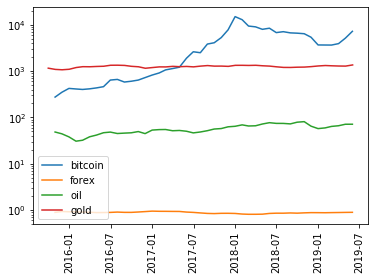

In [85]:
plt.plot(bitcoin.index, bitcoin['Close'], label = 'bitcoin')
plt.plot(currency_1.index, currency_1['EURO AREA - EURO/US$'], label = 'forex')
plt.plot(oil.index, oil['Price'], label = 'oil')
plt.plot(gold.index, gold['Price'], label = 'gold')
plt.legend()
plt.xticks(rotation='vertical')
plt.yscale(value = 'log')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

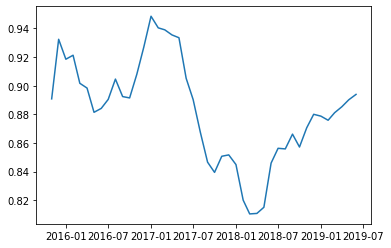

In [90]:
plt.plot(currency_1.index, currency_1['EURO AREA - EURO/US$'], label = 'forex')
plt.show

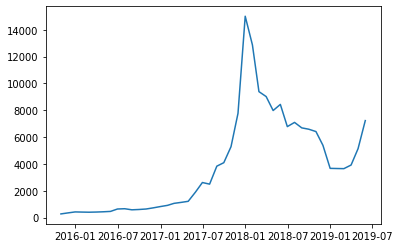

In [91]:
plt.plot(bitcoin.index, bitcoin['Close'], label = 'bitcoin')

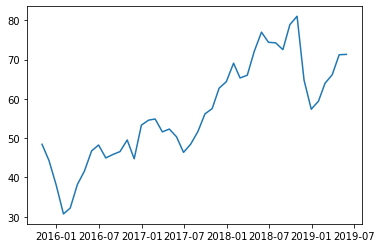

In [93]:
plt.plot(oil.index, oil['Price'], label = 'oil')

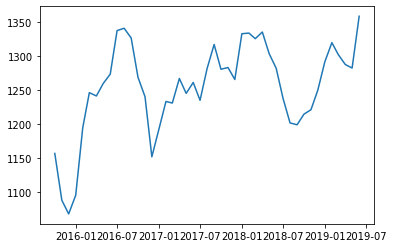

In [92]:
plt.plot(gold.index, gold['Price'], label = 'gold')